# Thickness of Shapes

- **By:** [Michael T. Kuczynski](https://www.linkedin.com/in/mkuczyns/), [Nathan Neeteson](https://www.linkedin.com/in/nathan-neeteson/), 2023  
- **License:** CC-BY 
- **How to cite:** Cite the ORMIR_XCT publication: *Kuczynski et al., (2024). ORMIR_XCT: A Python package for high resolution peripheral quantitative computed tomography image processing. Journal of Open Source Software, 9(97), 6084, https://doi.org/10.21105/joss.06084*

---
# Aims

- Investigate the local thickness of structures in Python using the ORMIR_XCT package.

  **Table of contents**  
  [Step 1: Imports](#imports)   
  [Step 2: Generating Shapes](#shapes)  
  [Step 3: Check Estimated Thickness](#check)  

---

<a name="imports"></a>
## *Step 1: Imports:*

In [1]:
import numpy as np
import SimpleITK as sitk

from matplotlib import pyplot as plt
from ormir_xct.util.hildebrand_thickness import calc_structure_thickness_statistics

---

<a name="shapes"></a>
## *Step 2: Synthetic shape mask functions:*

In [2]:
def create_shape(shape, voxel_widths, thickness, shape_type="sphere"):
    center = (
        voxel_widths[0] * (shape[0] // 2),
        voxel_widths[1] * (shape[1] // 2),
        voxel_widths[2] * (shape[2] // 2),
    )
    x, y, z = np.meshgrid(
        *[voxel_widths[i] * np.arange(0, shape[i]) for i in range(3)], indexing="ij"
    )
    if shape_type == "sphere":
        mask = (
            ((x - center[0]) ** 2 + (y - center[1]) ** 2 + (z - center[2]) ** 2)
            < (thickness / 2) ** 2
        ).astype(int)
    elif shape_type == "cylinder":
        mask = (
            ((x - center[0]) ** 2 + (y - center[1]) ** 2) < (thickness / 2) ** 2
        ).astype(int)
    elif shape_type == "plate":
        mask = (np.abs(x - center[0]) < thickness / 2).astype(int)
    else:
        raise ValueError(
            f"`shape_type` can be `sphere`, `cylinder`, `plate`; got {shape_type}"
        )
    return mask

Generate a synthetic sphere, cylinder, and plate:

In [3]:
shape = tuple([50] * 3)
voxel_widths = tuple([0.0607] * 3)
radius = 1

sphere = create_shape(shape, voxel_widths, radius, shape_type="sphere")
cylinder = create_shape(shape, voxel_widths, radius, shape_type="cylinder")
plate = create_shape(shape, voxel_widths, radius, shape_type="plate")

---

<a name="check"></a>
## *Step 3: Check their estimated mean thicknesses:*

In [5]:
sphere_thickness_stats = calc_structure_thickness_statistics(sphere, voxel_widths, 0)
cylinder_thickness_stats = calc_structure_thickness_statistics(
    cylinder, voxel_widths, 0
)
plate_thickness_stats = calc_structure_thickness_statistics(plate, voxel_widths, 0)

In [6]:
print(
    f"Sphere thickness is {sphere_thickness_stats[0]:0.3f} +/- {sphere_thickness_stats[1]:0.3f}"
)
print(
    f"Cylinder thickness is {cylinder_thickness_stats[0]:0.3f} +/- {cylinder_thickness_stats[1]:0.3f}"
)
print(
    f"Plate thickness is {plate_thickness_stats[0]:0.3f} +/- {plate_thickness_stats[1]:0.3f}"
)

Sphere thickness is 0.898 +/- 0.000
Cylinder thickness is 0.929 +/- 0.000
Plate thickness is 1.032 +/- 0.000


This checks out because we set `radius = 1` when we generated these shapes.

Now we can do a sweep over spheres, cylinders, and plates of various thicknesses to see how well we can estimate the thickness of these shapes at various resolutions.

In [7]:
shape = (100, 100, 100)
voxel_widths = (1, 1, 1)

true_thicknesses = np.arange(5, 50, 5)

est_sph_thicknesses = []
est_cyl_thicknesses = []
est_plt_thicknesses = []

for thickness in true_thicknesses:
    print(f"thickness: {thickness}")

    sphere = create_shape(shape, voxel_widths, thickness, shape_type="sphere")
    est_sph_thicknesses.append(
        calc_structure_thickness_statistics(sphere, voxel_widths, 0)[0]
    )

    cylinder = create_shape(shape, voxel_widths, thickness, shape_type="cylinder")
    est_cyl_thicknesses.append(
        calc_structure_thickness_statistics(cylinder, voxel_widths, 0)[0]
    )

    plate = create_shape(shape, voxel_widths, thickness, shape_type="plate")
    est_plt_thicknesses.append(
        calc_structure_thickness_statistics(plate, voxel_widths, 0)[0]
    )

thickness: 5
thickness: 10
thickness: 15
thickness: 20
thickness: 25
thickness: 30
thickness: 35
thickness: 40
thickness: 45


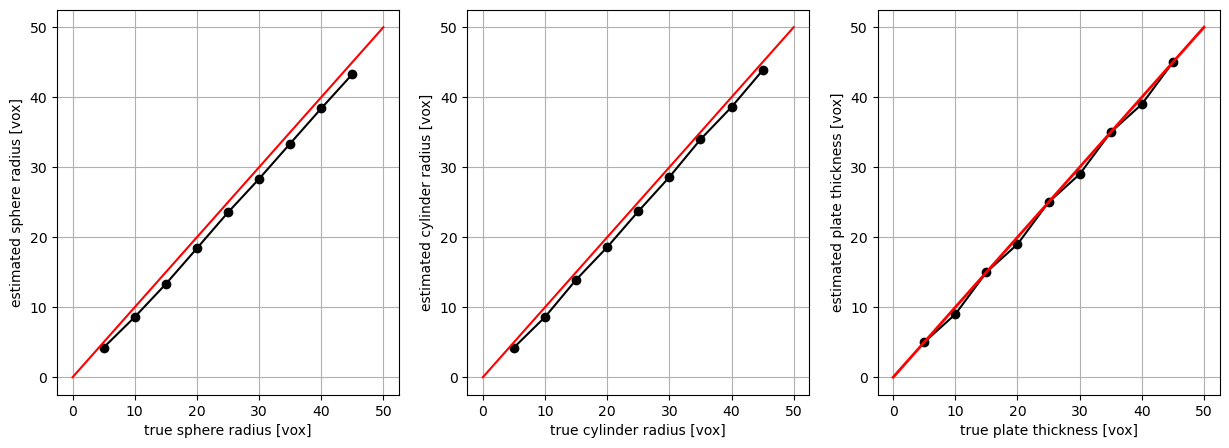

In [8]:
max_size = max(shape) // 2

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(true_thicknesses, est_sph_thicknesses, "k-o")
axs[0].plot([0, max_size], [0, max_size], "r-")
axs[0].grid()

axs[0].set_xlabel("true sphere radius [vox]")
axs[0].set_ylabel("estimated sphere radius [vox]")

axs[1].plot(true_thicknesses, est_cyl_thicknesses, "k-o")
axs[1].plot([0, max_size], [0, max_size], "r-")
axs[1].grid()

axs[1].set_xlabel("true cylinder radius [vox]")
axs[1].set_ylabel("estimated cylinder radius [vox]")

axs[2].plot(true_thicknesses, est_plt_thicknesses, "k-o")
axs[2].plot([0, max_size], [0, max_size], "r-", linewidth=2)
axs[2].grid()

axs[2].set_xlabel("true plate thickness [vox]")
axs[2].set_ylabel("estimated plate thickness [vox]")

plt.show()

---
<a name="attribution"></a>

Notebook created using the [template](https://github.com/ORMIRcommunity/templates/blob/main/ORMIR_nb_template.ipynb) of the [ORMIR community](https://ormircommunity.github.io/) (version 1.0, 2023)